# PCA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.decomposition as skd
import seaborn as sns
import pickle as pkl

In [3]:
df = pd.read_csv('data/cleaned_train_data.csv')


In [4]:
df['rating']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4958342    0.0
4958343    0.0
4958344    0.0
4958345    1.0
4958346    0.0
Name: rating, Length: 4958347, dtype: float64

In [5]:
#Drop the target variable
dropped_cols = df[['rating']]
df = df.drop(columns=['rating'], axis=1)
var_threshhold = 0.95

<AxesSubplot: >

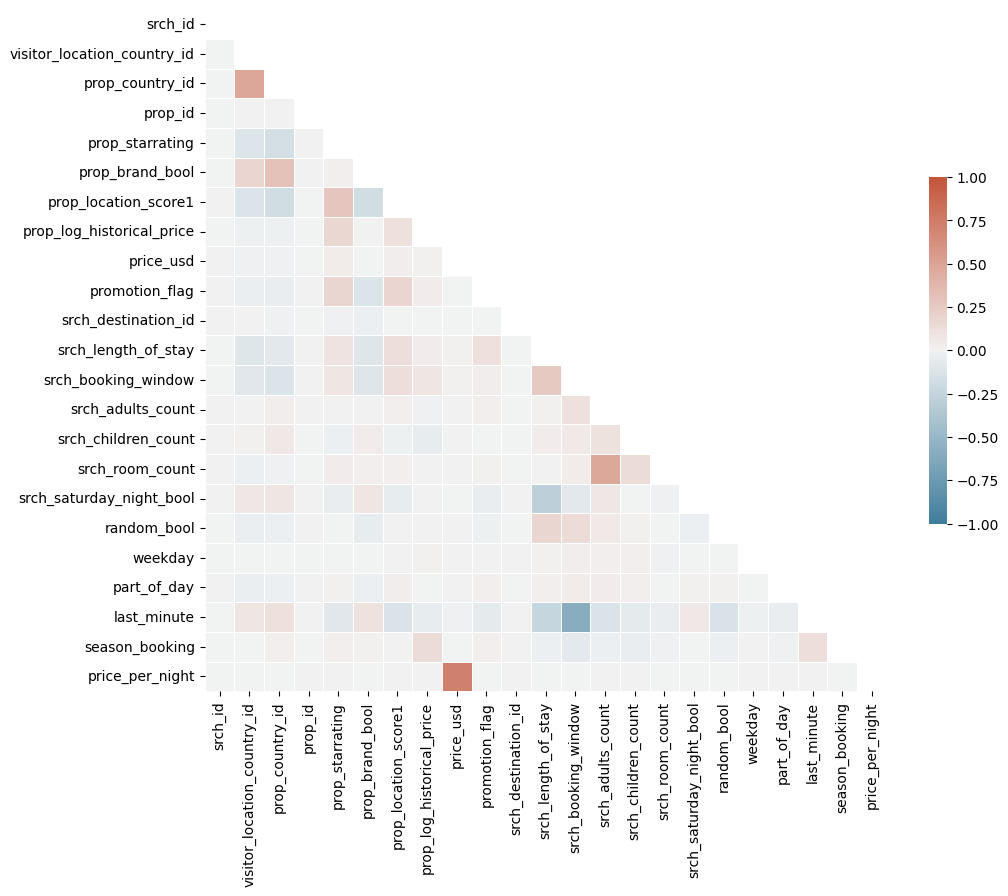

In [31]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
len(corr_matrix)

23

In [8]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [9]:
var_threshhold = 0.95
pca = skd.PCA(n_components=len(corr_matrix))
df_pca = pca.fit_transform(normalized_df)

for i, x in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if x > var_threshhold:
        print(f"we can get away with 95% variance by using the first {i+1} components: {x}")
        break
top_components = i+1
top_components
with open("./models/pca.pkl", "wb") as file:
    pkl.dump(pca, file)

we can get away with 95% variance by using the first 14 components: 0.9514590512545604


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14145082, 0.2498733 , 0.3512123 , 0.43784712, 0.51518279,
       0.58576901, 0.634547  , 0.68273728, 0.72365512, 0.76132412,
       0.79821933, 0.83507102, 0.8710765 , 0.90546805, 0.92982671,
       0.95164393, 0.97029851, 0.98391275, 0.98938184, 0.99249552,
       0.99558604, 0.99842276, 0.99951802, 0.99999954, 1.        ])

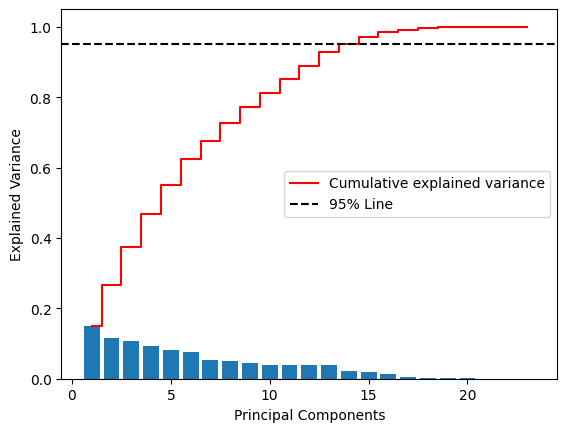

In [30]:
plt.bar(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1,len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color='red')
plt.axhline(0.95, color="black", linestyle="dashed", label='95% Line')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

In [26]:
loadings = pca.components_.T
loadings_column = [f'PC{i}' for i in range(1, len(corr_matrix) + 1)]
df_loadings = pd.DataFrame(loadings, columns=loadings_column, index=normalized_df.columns)

In [25]:
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
srch_id,0.002260,0.000078,0.003723,-0.000622,-0.002336,-0.000722,0.015081,-0.001617,-0.027453,0.210071,...,0.003853,0.000419,-0.001329,-0.001875,0.001504,-0.000743,-0.000035,-0.000623,0.000103,-2.735420e-06
visitor_location_country_id,-0.151669,-0.047425,-0.111973,-0.028005,0.026237,0.069089,-0.628052,-0.087844,-0.049623,-0.165966,...,0.401707,0.594790,0.015208,0.011020,0.005239,-0.002815,0.005630,0.003336,0.005605,5.631324e-06
prop_country_id,-0.210977,-0.058931,-0.179897,-0.024879,0.057593,0.088849,-0.601979,-0.089452,-0.071460,-0.132150,...,-0.162757,-0.691601,-0.079776,-0.022589,0.008951,-0.004869,-0.017390,0.006520,-0.002107,3.165073e-06
prop_id,0.000060,-0.000801,-0.001108,0.001834,0.000588,0.004026,0.000904,-0.001609,-0.002778,0.037355,...,0.001588,-0.001995,0.004853,-0.000013,-0.000245,-0.000145,0.000299,0.000030,-0.000197,1.301276e-06
prop_starrating,0.049981,0.006294,0.003831,-0.051682,0.098944,0.065132,0.195706,0.026155,0.044490,-0.154442,...,0.520553,-0.176918,-0.774759,-0.001280,-0.001977,-0.004598,0.010493,-0.007656,-0.006563,-1.919026e-04
prop_brand_bool,-0.517492,-0.183346,-0.685745,-0.170962,0.216020,0.131804,0.336211,0.050329,0.007486,0.077281,...,0.027226,0.059584,0.085671,-0.003928,0.003169,-0.000632,-0.005183,-0.002583,0.002991,5.030660e-06
prop_location_score1,0.107086,0.013978,0.069793,-0.040512,0.064381,0.041259,0.112391,0.015359,0.024628,-0.132446,...,0.672405,-0.346852,0.606409,-0.011533,-0.012933,0.007355,0.004390,-0.001643,-0.006454,-6.074218e-05
prop_log_historical_price,0.024023,0.002020,0.011924,-0.003067,0.208454,-0.075363,0.140581,0.036511,0.138115,-0.885373,...,-0.248017,0.083547,0.059801,0.008120,-0.015988,0.008591,0.013804,-0.002005,-0.000280,-2.359216e-05
position,-0.021334,-0.003561,-0.029413,0.011067,-0.049471,-0.109549,-0.067448,-0.014844,-0.025363,0.018767,...,0.077046,0.013802,-0.117987,0.007397,0.004241,-0.000080,0.008027,0.002986,-0.001311,3.938681e-06
price_usd,0.000026,-0.000002,-0.000005,-0.000004,0.000002,-0.000003,0.000051,0.000017,0.000012,-0.000063,...,0.000135,-0.000059,-0.000109,0.000039,0.000040,-0.000028,0.000029,-0.000107,0.000080,1.000000e+00


[Text(0, 0.5, 'PC1'),
 Text(0, 1.5, 'PC2'),
 Text(0, 2.5, 'PC3'),
 Text(0, 3.5, 'PC4'),
 Text(0, 4.5, 'PC5'),
 Text(0, 5.5, 'PC6'),
 Text(0, 6.5, 'PC7'),
 Text(0, 7.5, 'PC8'),
 Text(0, 8.5, 'PC9'),
 Text(0, 9.5, 'PC10'),
 Text(0, 10.5, 'PC11'),
 Text(0, 11.5, 'PC12'),
 Text(0, 12.5, 'PC13'),
 Text(0, 13.5, 'PC14'),
 Text(0, 14.5, 'PC15'),
 Text(0, 15.5, 'PC16'),
 Text(0, 16.5, 'PC17'),
 Text(0, 17.5, 'PC18'),
 Text(0, 18.5, 'PC19'),
 Text(0, 19.5, 'PC20'),
 Text(0, 20.5, 'PC21'),
 Text(0, 21.5, 'PC22'),
 Text(0, 22.5, 'PC23')]

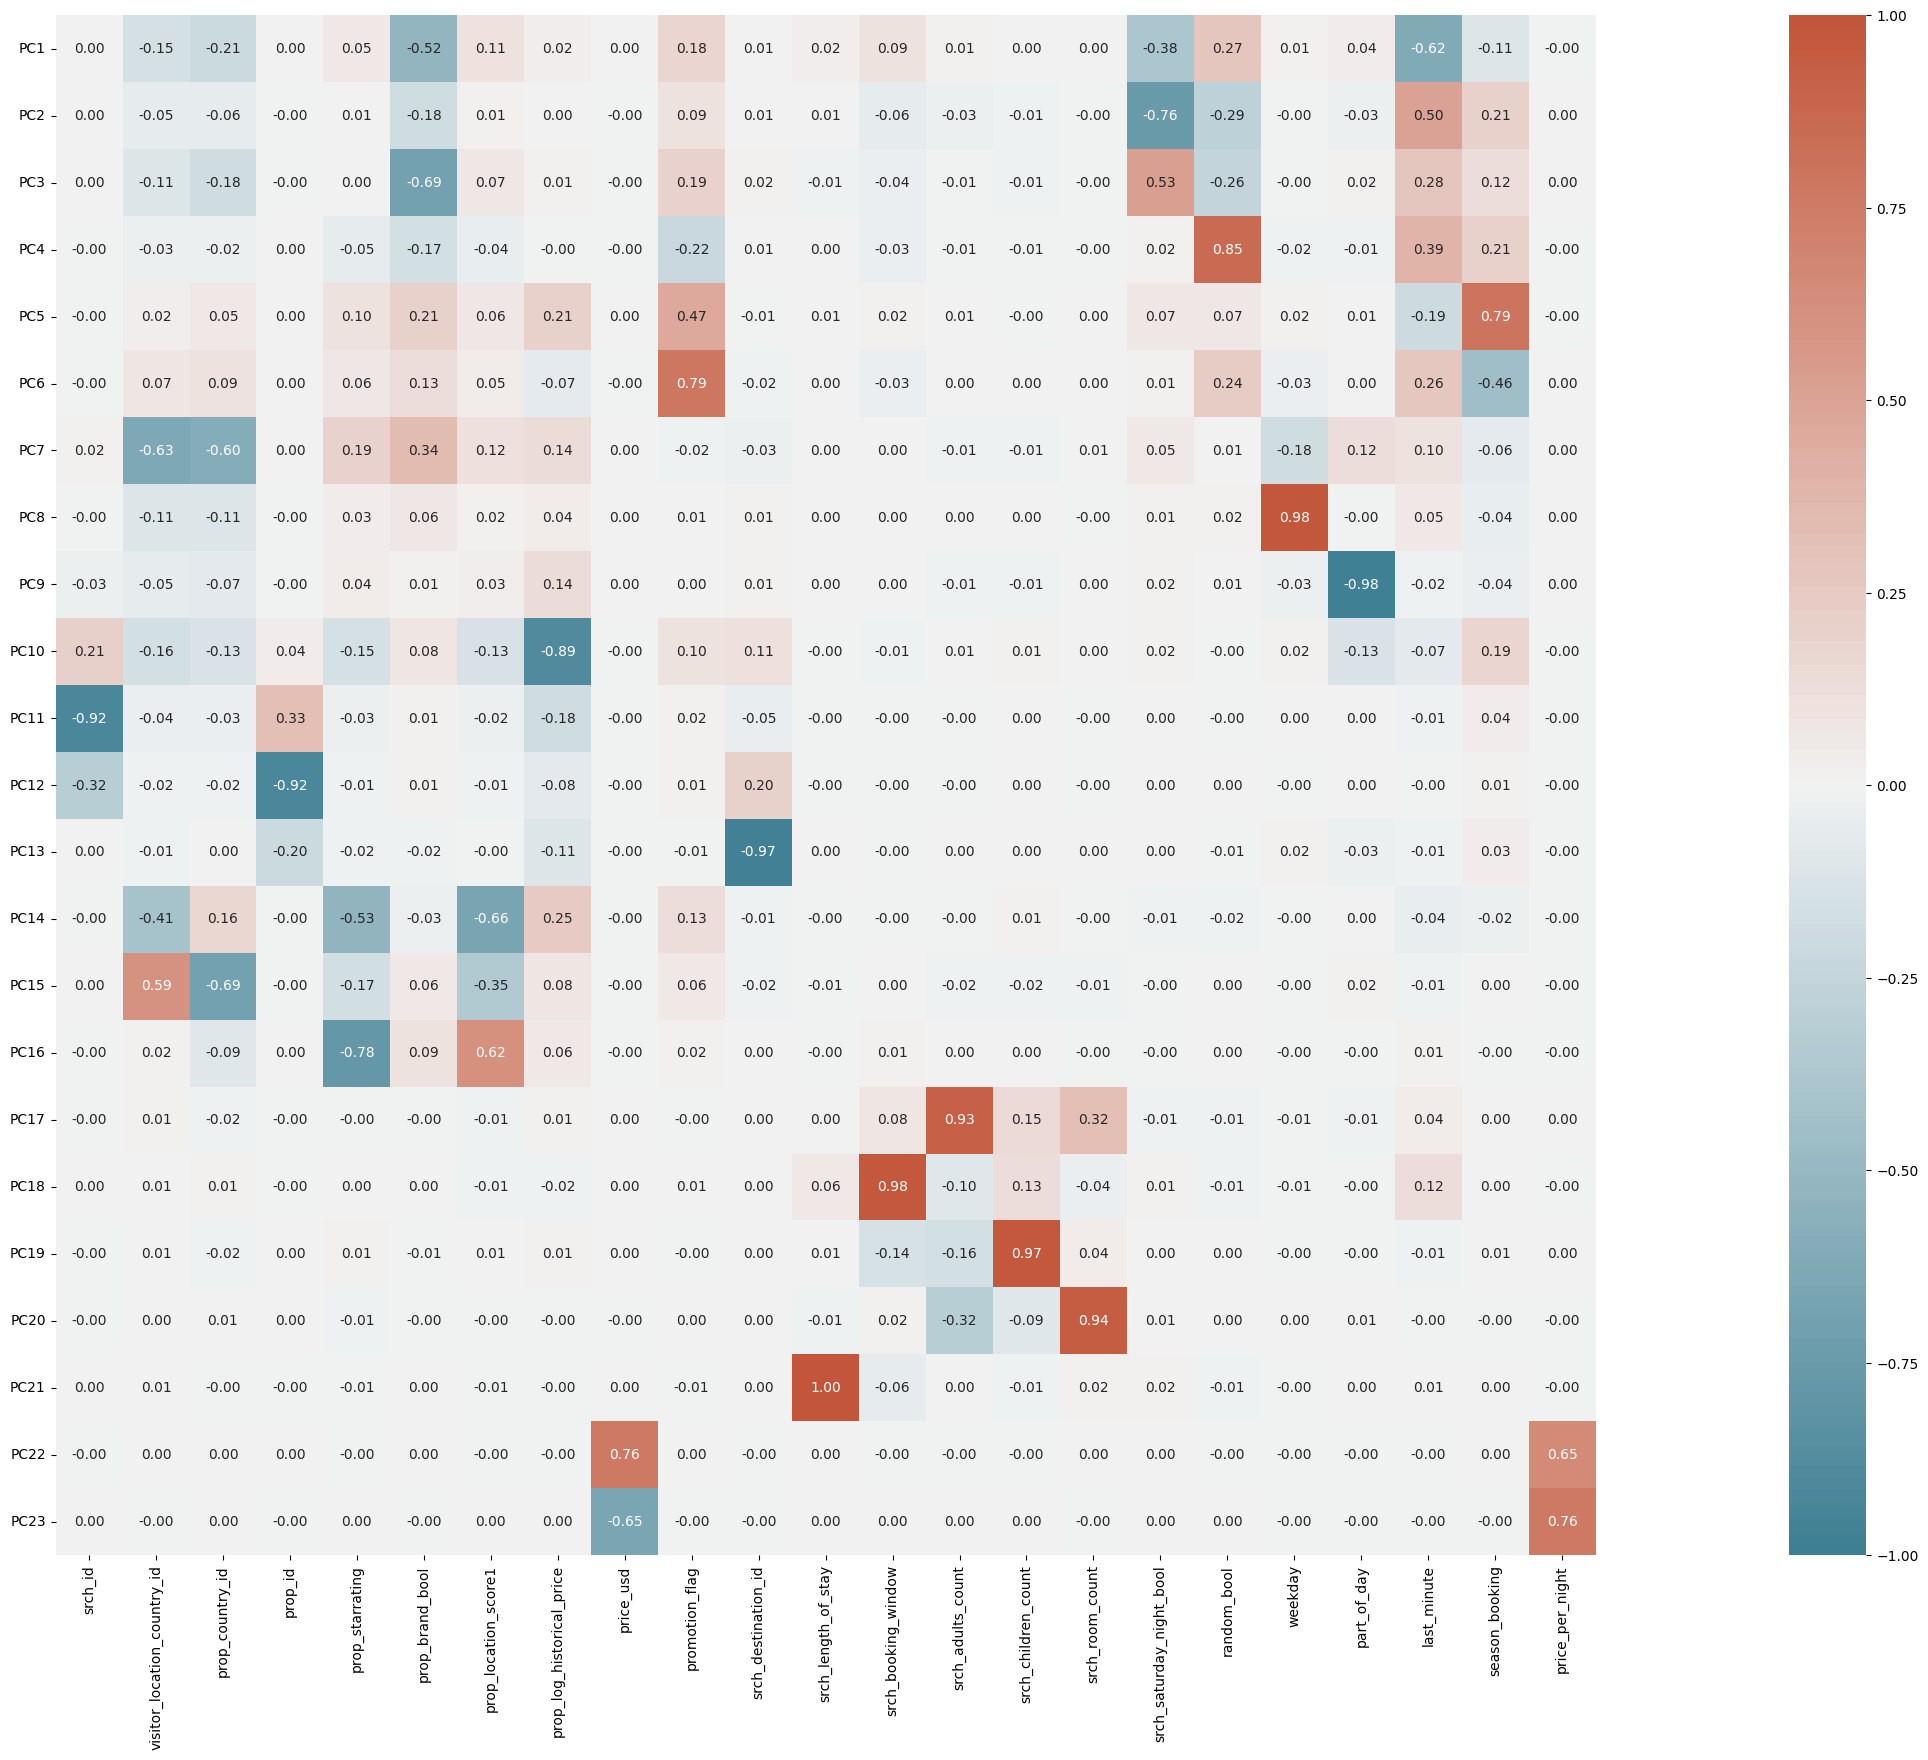

In [27]:
plt.figure(figsize=(50,20))

# plot the heatmap for correlation matrix
ax = sns.heatmap(df_loadings.T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)

In [27]:
droppables = []
for row in (pca.components_**2)[:top_components].round(2):
    for val, col in zip(row, df.columns):
        if val > 0 and col not in droppables:
            droppables.append(col)

In [28]:
pd.concat(
    (dropped_cols[[]],
    df.drop(droppables,axis=1),
    pd.DataFrame.from_dict({f'PCA{i+1}':v for i,v in enumerate(df_pca[:,:top_components].transpose())}),
    dropped_cols[['rating']]),
    axis=1
    ).to_csv("./data/cleaned_data_PCA.csv", index=False)

NameError: name 'dropped_cols' is not defined

In [50]:
dfcleaned = pd.read_csv('./data/cleaned_data_PCA.csv')
dfcleaned.head()

,price_usd,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,rating
0,104.77,1,4,0,1,-0.564865,-0.497224,-0.156020,0.708691,-0.362991,0.391593,0.040163,0.096848,0.269100,-0.278392,0.238515,0.663230,-0.245619,-0.006221,0.0
1,170.74,1,4,0,1,-0.564292,-0.497297,-0.161778,0.702336,-0.346957,0.399717,0.070220,0.101960,0.277081,-0.306022,0.255294,0.597976,-0.264459,-0.050318,0.0
2,179.80,1,4,0,1,-0.574611,-0.498596,-0.162545,0.712625,-0.369737,0.388316,0.029263,0.094601,0.265673,-0.256748,0.288925,0.530539,-0.274155,0.051981,0.0
3,602.77,1,4,0,1,-0.576736,-0.498815,-0.157809,0.719336,-0.400935,0.385572,-0.010502,0.086351,0.247465,-0.161306,0.321114,0.499405,-0.269662,0.076649,0.0
4,143.58,1,4,0,1,-0.557929,-0.496570,-0.157717,0.700077,-0.346245,0.404301,0.075372,0.102353,0.276134,-0.295127,0.301138,0.472944,-0.290696,-0.096265,0.0


In [54]:
len(dfcleaned.columns)

20